# **Step 1: Import all necessary libraries, reading and understanding data**


In [249]:
# Import all necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Reading,Understanding and Preparation


In [250]:
# Reading and Understanding data

bikeset = pd.read_csv('day.csv')
bikeset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [251]:
#Checking the shape of the dataset
bikeset.shape

(730, 16)

In [252]:
#Checking the info of dataset
bikeset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### From the above info() function,we can conclude that there are no null values in any of the columns in data set

In [253]:
#Checking dataset description of the dataset
bikeset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [254]:
# checking for null values

bikeset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [255]:
# Handling Irrelevant columns

irr_bike = bikeset[['casual','registered','cnt']]
irr_bike.corr()

,casual,registered,cnt
casual,1.000000,0.394137,0.672123
registered,0.394137,1.000000,0.945411
cnt,0.672123,0.945411,1.000000


cnt = casual + registered .
We can drop off casual and registered columns for further analysis.  

In [256]:
#Dropping irrelevant columns from the dataset
#Column instant and dteday are irrelevant and not needed for model building so dropping
bikeset.drop(['instant','dteday','casual','registered'], axis = 1, inplace=True)

bikeset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# **Step 2: Preparing data for modeling**

In [257]:
bikeset.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [258]:
bikeset.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

# Common functions

In [259]:
# function to convert season to categorical string variable
def map_season(x):
  return x.map({1:'Spring' , 2:'Summer' ,3:'Fall' , 4:'Winter' })

# function to convert weathersit to categorical string variable
def weathersit_map(x):
  return x.map({1:'Clear' , 2:'Misty' ,3:'Light snow_rain' , 4:'Heavy snow_rain' })

# function to convert weekday to categorical string variable
def weekday_map(x):
  return x.map({0: 'sun',1:'mon' , 2:'tues' ,3:'wed' , 4:'thurs', 5: 'fri', 6: 'sat' })

# function to convert month to categorical string variable
def month_map(x):
  return  x.map({1:'jan' , 2:'feb' ,3:'mar' , 4:'apr', 5: 'may', 6: 'jun',7: 'jul',8: 'aug',9: 'sep',10: 'oct',11: 'nov',12: 'dec'})

# function to plot boxplot for categorical vars graph
def plot_categorical_vars(cat_vars , dep_var):
  plt.figure(figsize=(25,16))
  for i in range(0, len(cat_vars)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x= cat_vars[i], y= dep_var, data = bikeset)
  plt.show()

# function to plot barplot for categorical vars graph
def analyse_cat_vars(cat_col,x,y):
    plt.figure(figsize=(x,y))
    plt.subplot(1,2,1)
    sns.barplot(data=bikeset, x=cat_col, y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(x=cat_col,y='cnt', data= bikeset, hue='yr')
    plt.show()
    return


In [260]:
#mapping categorical variables with their subcategories to help with visualization analysis
bikeset[['season']] = bikeset[['season']].apply(map_season)
bikeset[['weathersit']] = bikeset[['weathersit']].apply(weathersit_map)
bikeset[['weekday']] = bikeset[['weekday']].apply(weekday_map)
bikeset[['mnth']] = bikeset[['mnth']].apply(month_map)
bikeset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


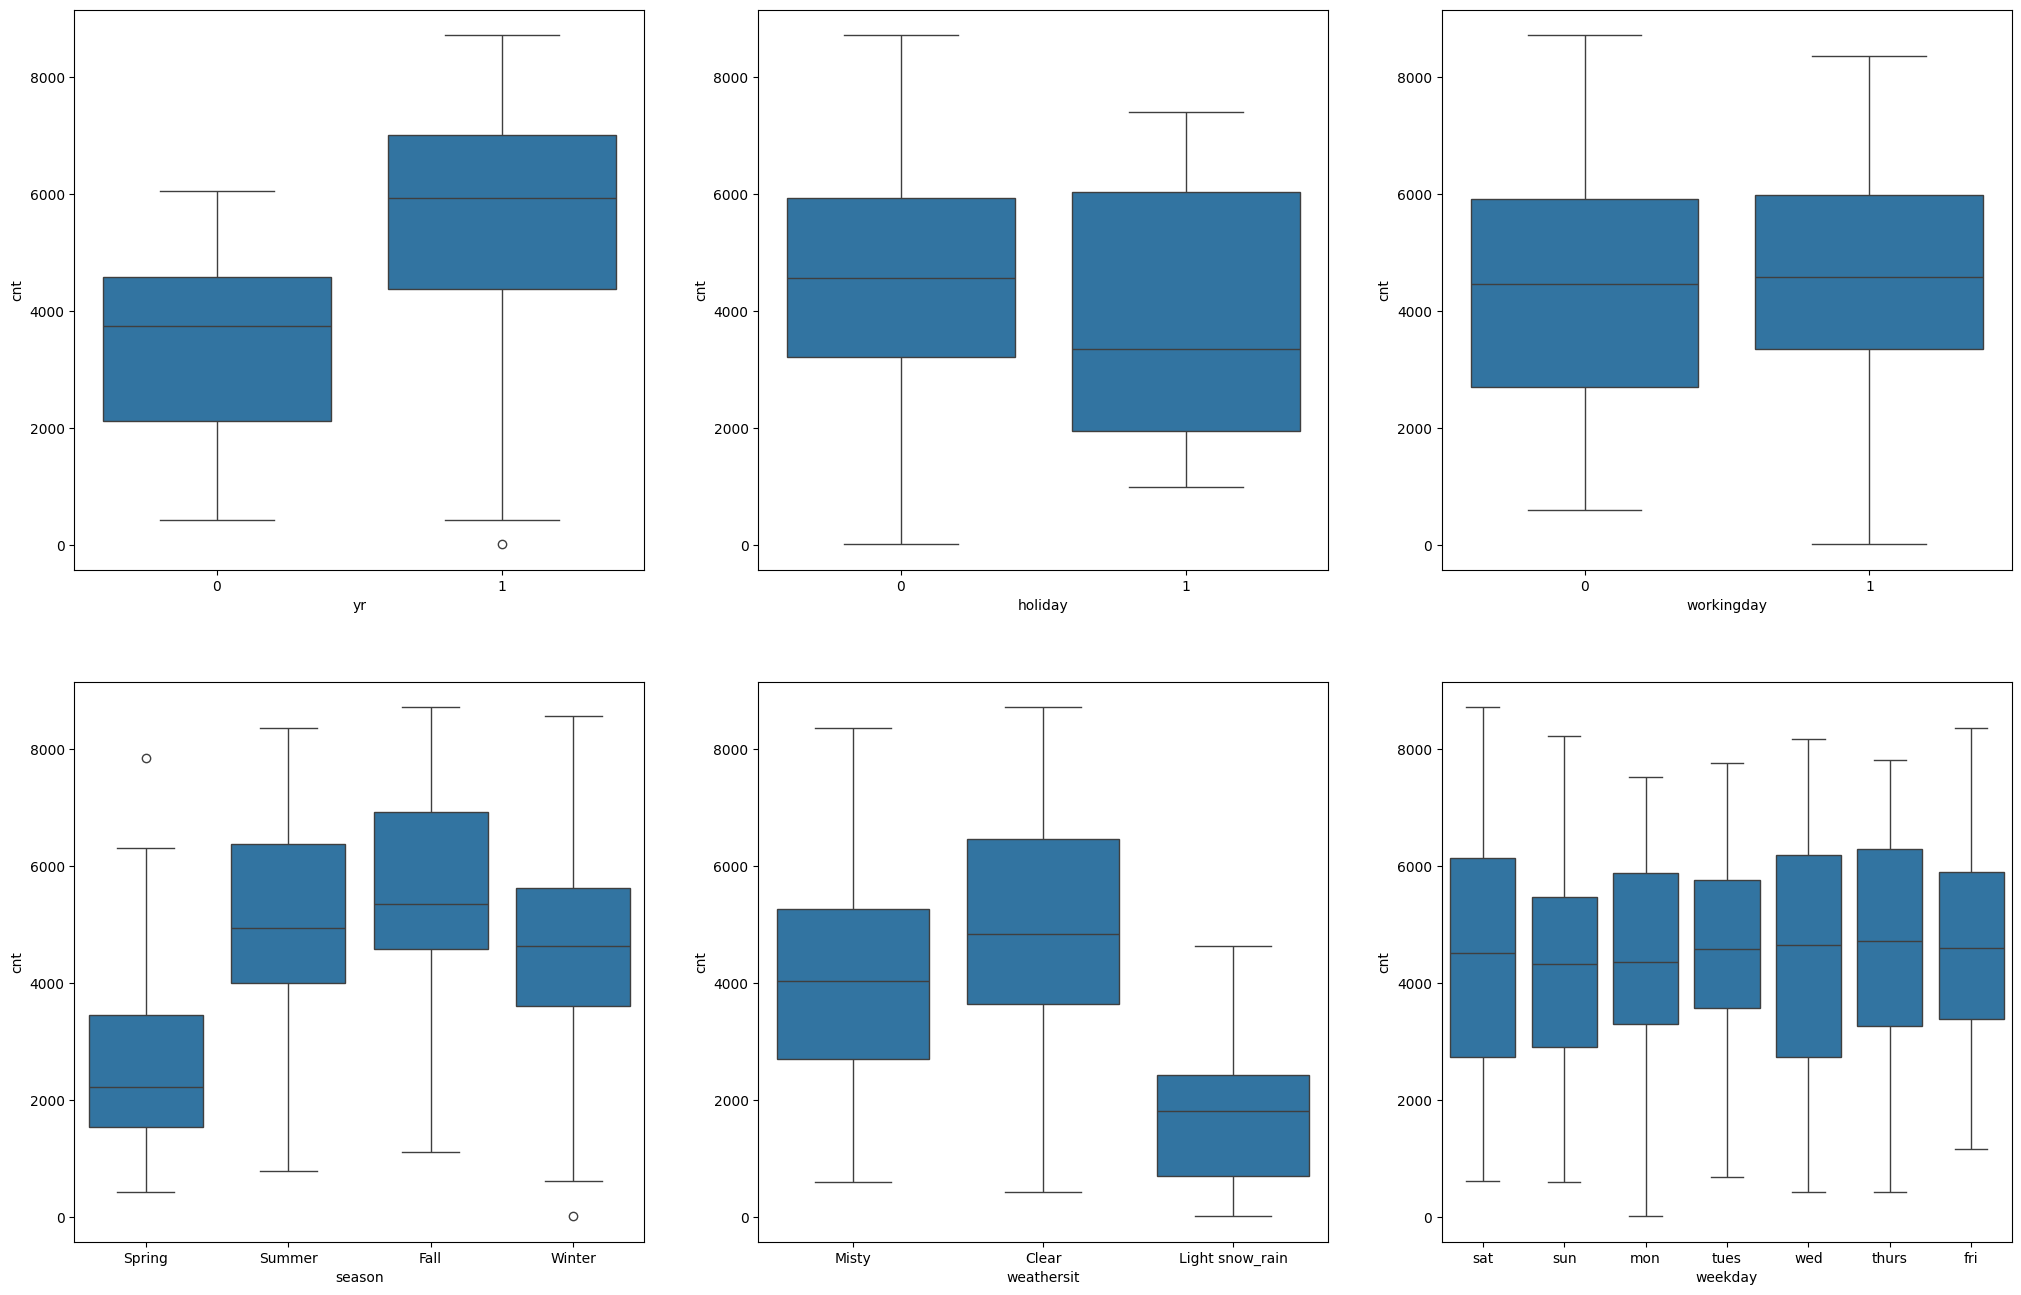

In [261]:
#visualizing the categorical variables of the dataset using boxplot
cat_vars = ['yr','holiday','workingday','season','weathersit','weekday']
plot_categorical_vars(cat_vars, 'cnt')

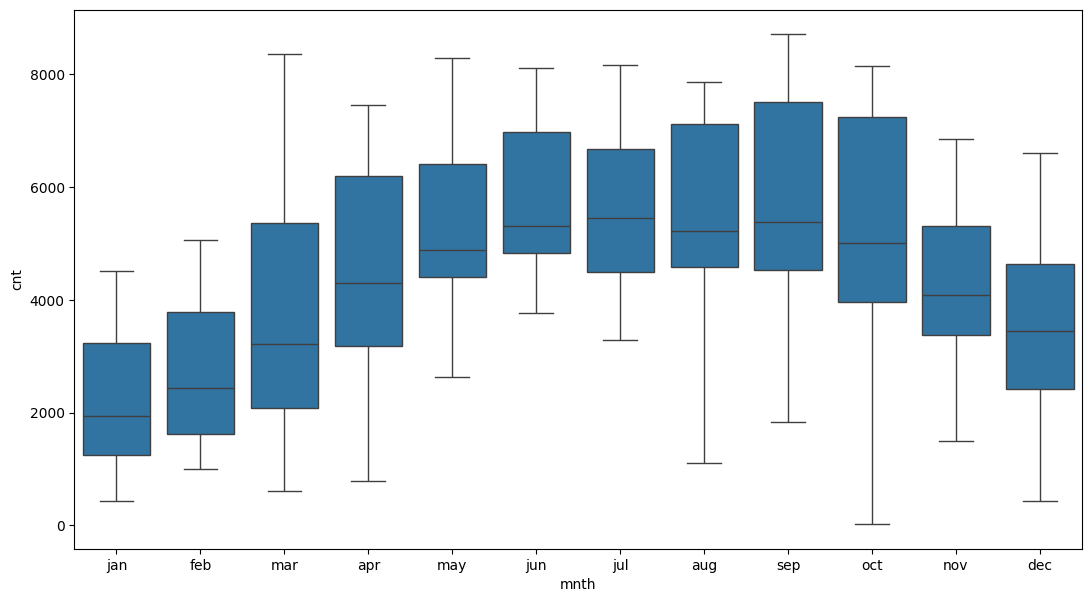

In [262]:
plt.figure(figsize=(13,7))
sns.boxplot(x = 'mnth', y='cnt', data = bikeset)
plt.show()

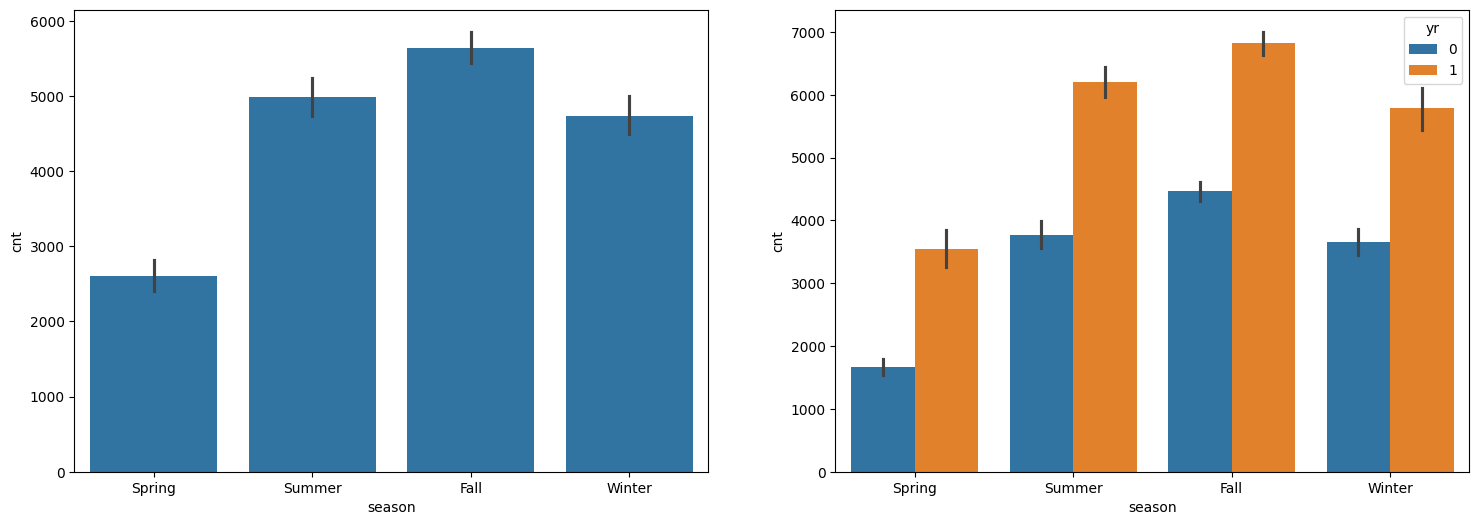

In [263]:
analyse_cat_vars('season',18,6)

We can see from above graph, there is **huge demand of bikes during Summer and fall** season.

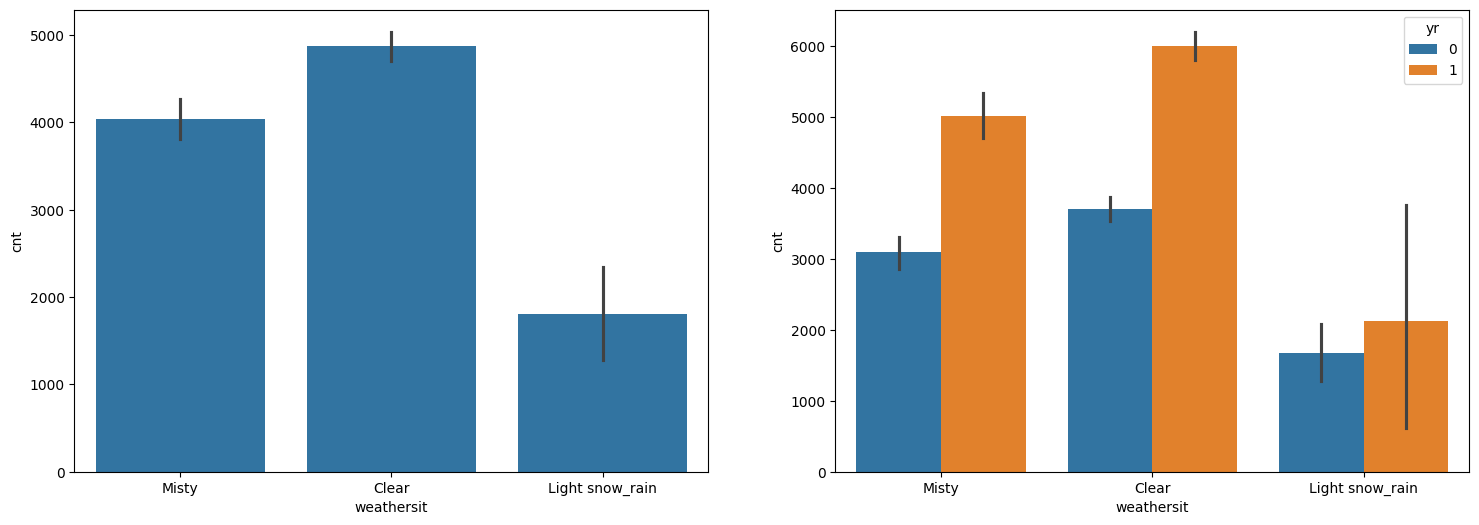

In [264]:
analyse_cat_vars('weathersit',18,6)

When weather situation is clear, bikes demand is huge.

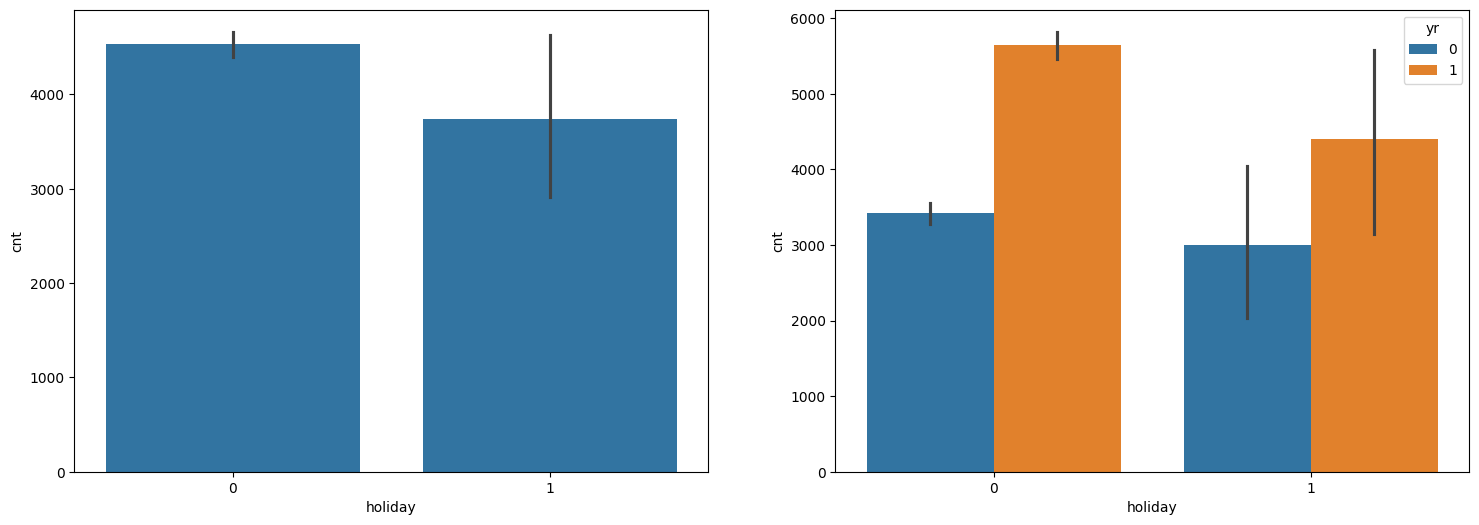

In [265]:
analyse_cat_vars('holiday',18,6)

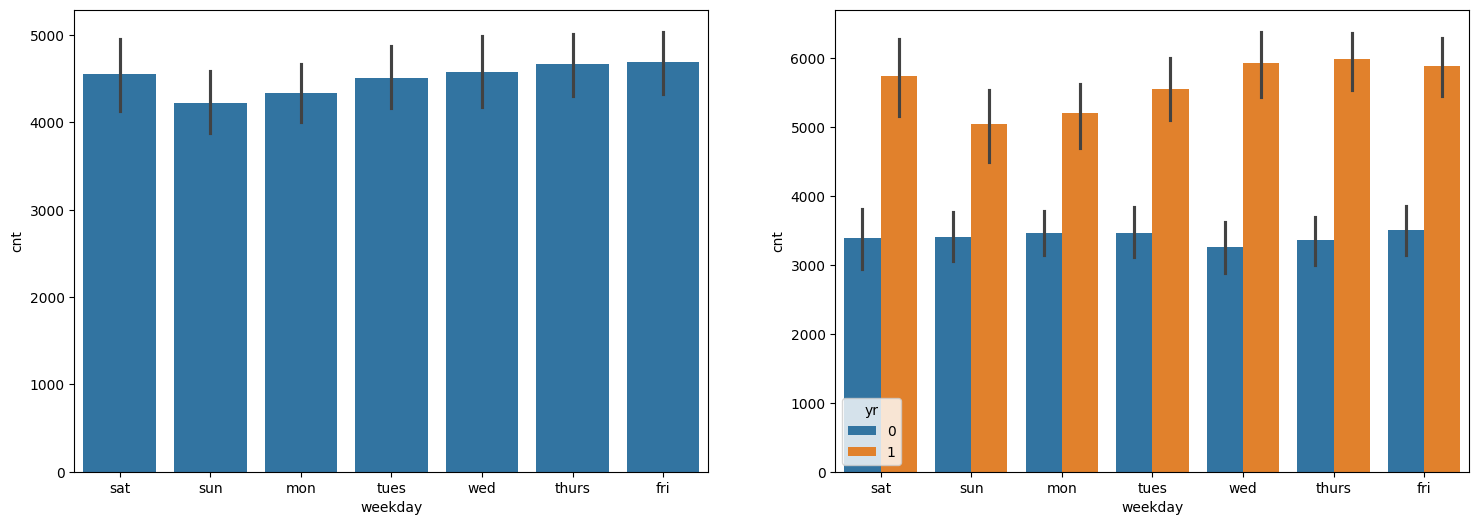

In [266]:
analyse_cat_vars('weekday',18,6)

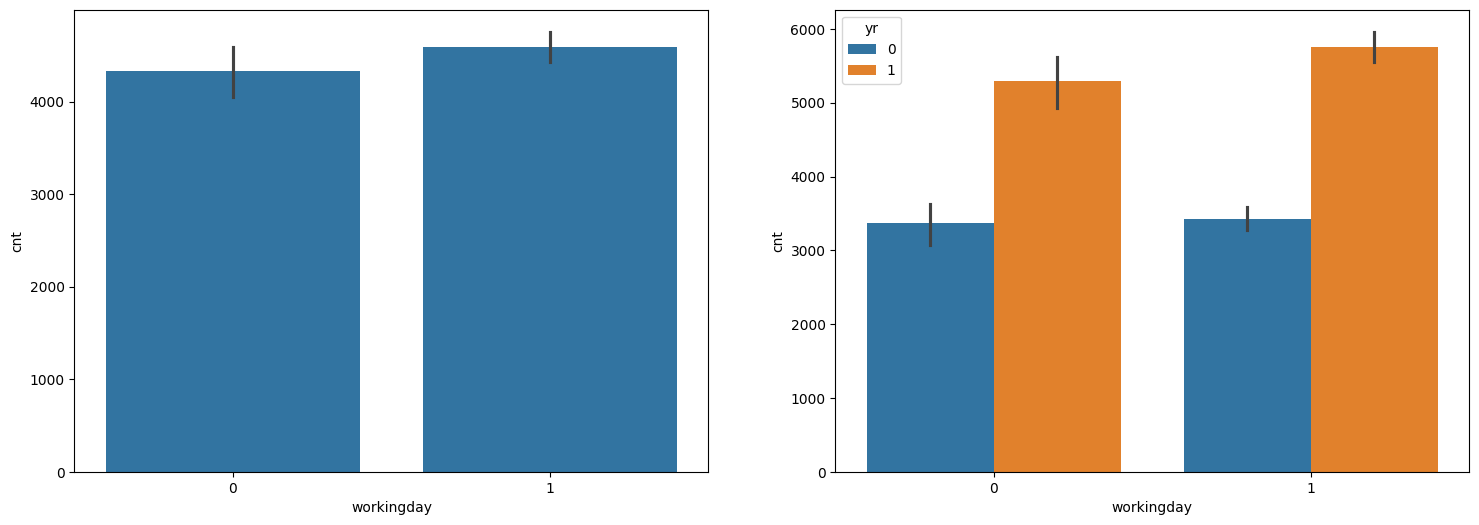

In [267]:
analyse_cat_vars('workingday',18,6)

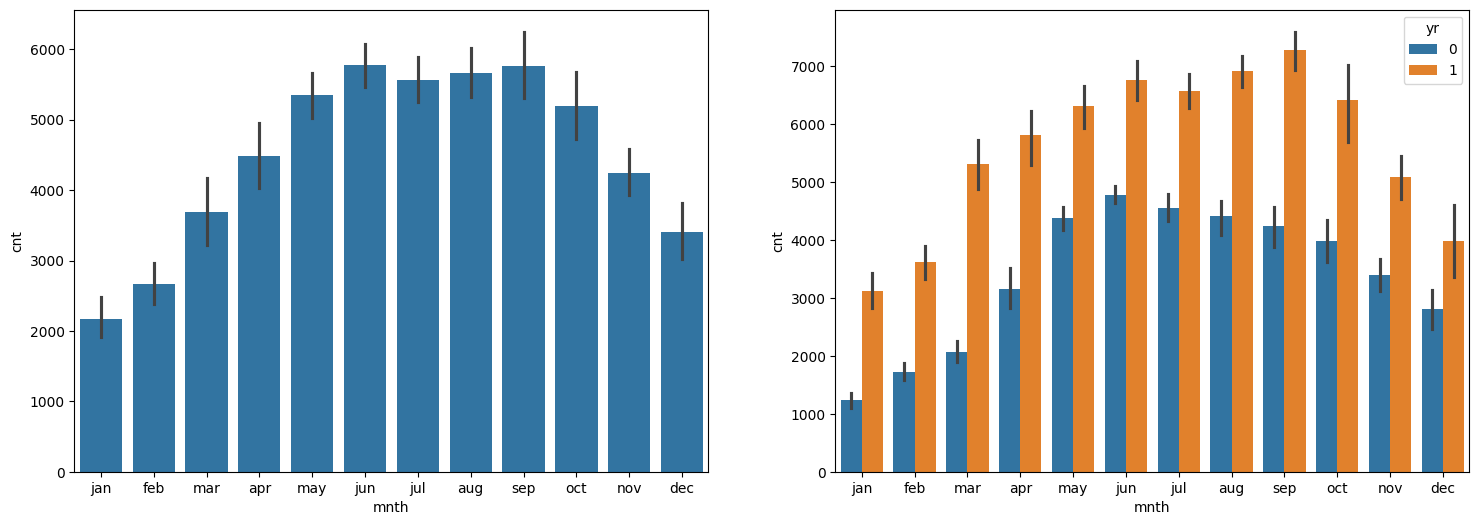

In [268]:
analyse_cat_vars('mnth',18,6)

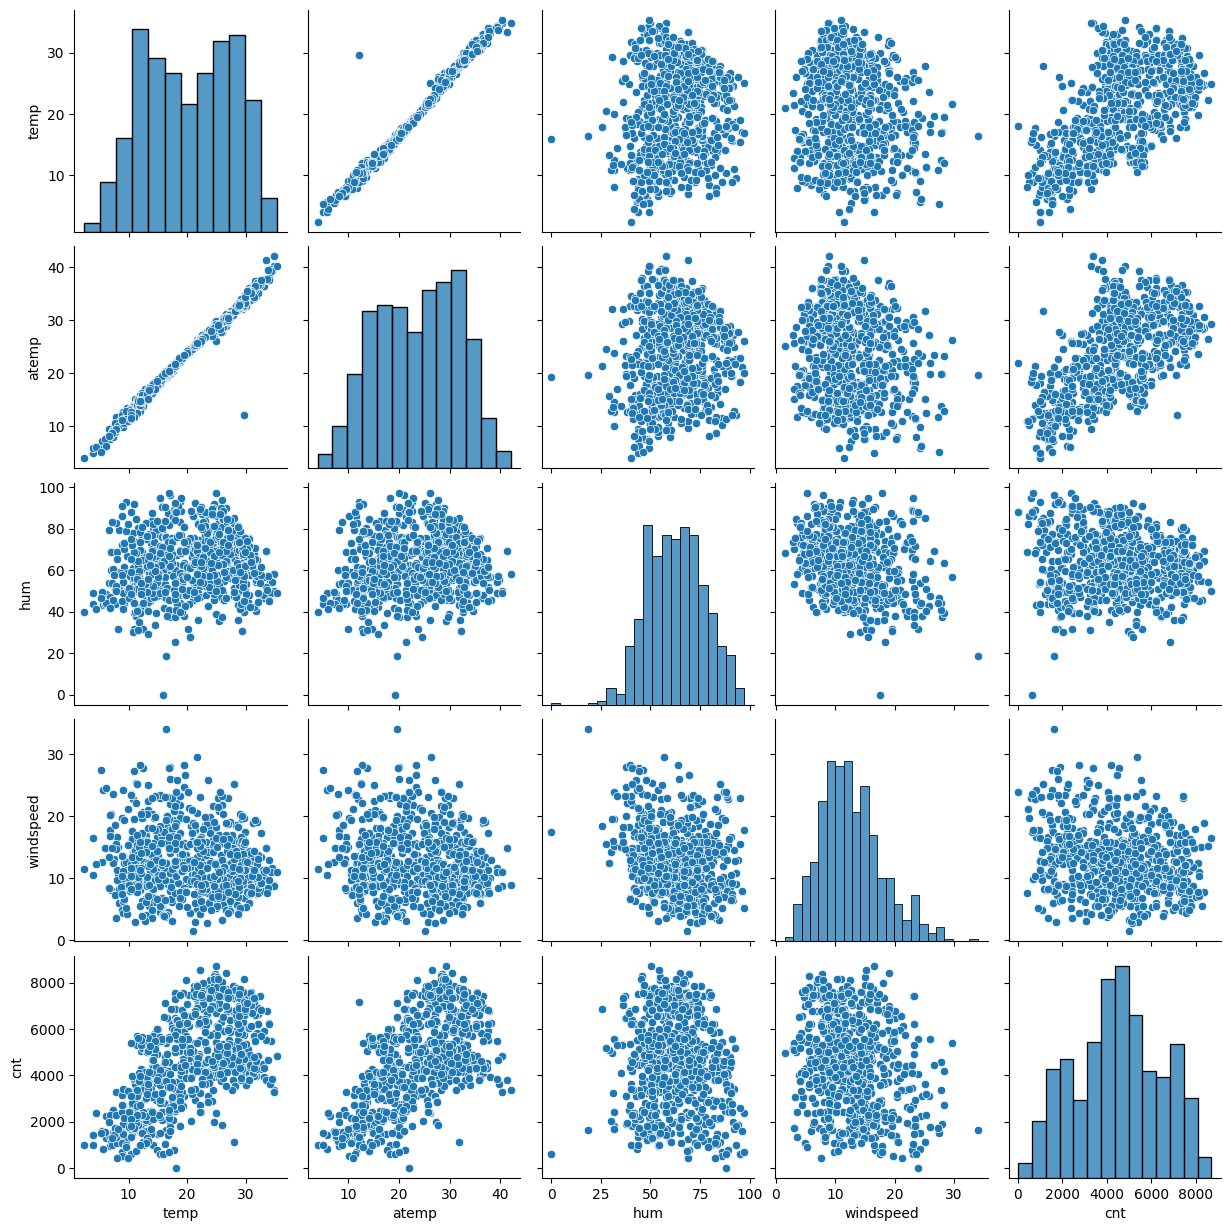

In [269]:
# Visualising all numeric variables using scatter representation
num_vars = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bikeset[num_vars])
plt.show()

We can observe that temp, atemp and cnt variable have some strong correlation

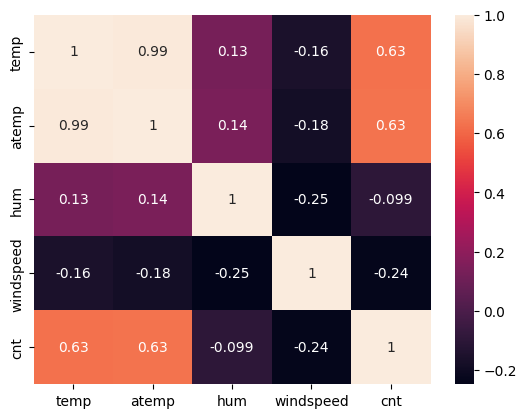

In [270]:
sns.heatmap(bikeset[num_vars].corr(), annot = True)
plt.show()

temp is highy correlated with atemp followed by cnt.


# Creating Dummy Variables

In [271]:
# creating dummy variables for month column
month_data = pd.get_dummies(bikeset['mnth'], drop_first=True, dtype='u1')

# creating dummy variable for season
ssn_data = pd.get_dummies(bikeset['season'], drop_first=True, dtype='u1')

# creating dummy variable for season
week_data = pd.get_dummies(bikeset['weekday'], drop_first=True, dtype='u1')

# creating dummy variable for season
weather_data = pd.get_dummies(bikeset['weathersit'], drop_first=True, dtype='u1')



In [272]:
# dropping columns which are irrelevant after creating dummy variables out of them
bikeset.drop(['mnth','season','weekday','weathersit'], axis = 1, inplace = True)


In [273]:
# concat dummy variables dataframe with original dataframe

bikeset_new = pd.concat([bikeset,ssn_data,week_data,weather_data,month_data], axis = 1)
bikeset_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [274]:
bikeset_new.shape

(730, 30)

# **Splitting into train and test**

In [275]:
# Splitting the data into training and test set for further prediction

df_train, df_test = train_test_split(bikeset_new , train_size= 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Rescaling

Here to normalise the data and handle the outliers, min-max scaling can be performed.

In [276]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed']

# using fit_transform() we are first fitting the variables and then transforming it.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
atemp,510.0,0.513156,0.212410,0.0,0.332086,0.529718,0.688457,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,4485.337255,1950.666077,22.0,3120.000000,4530.000000,5973.500000,8714.0
Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
Summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature and Maximum value is 1 for each of the Feature

In [277]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883
std,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.542596,0.529718,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


# **Step 3: Training the model**

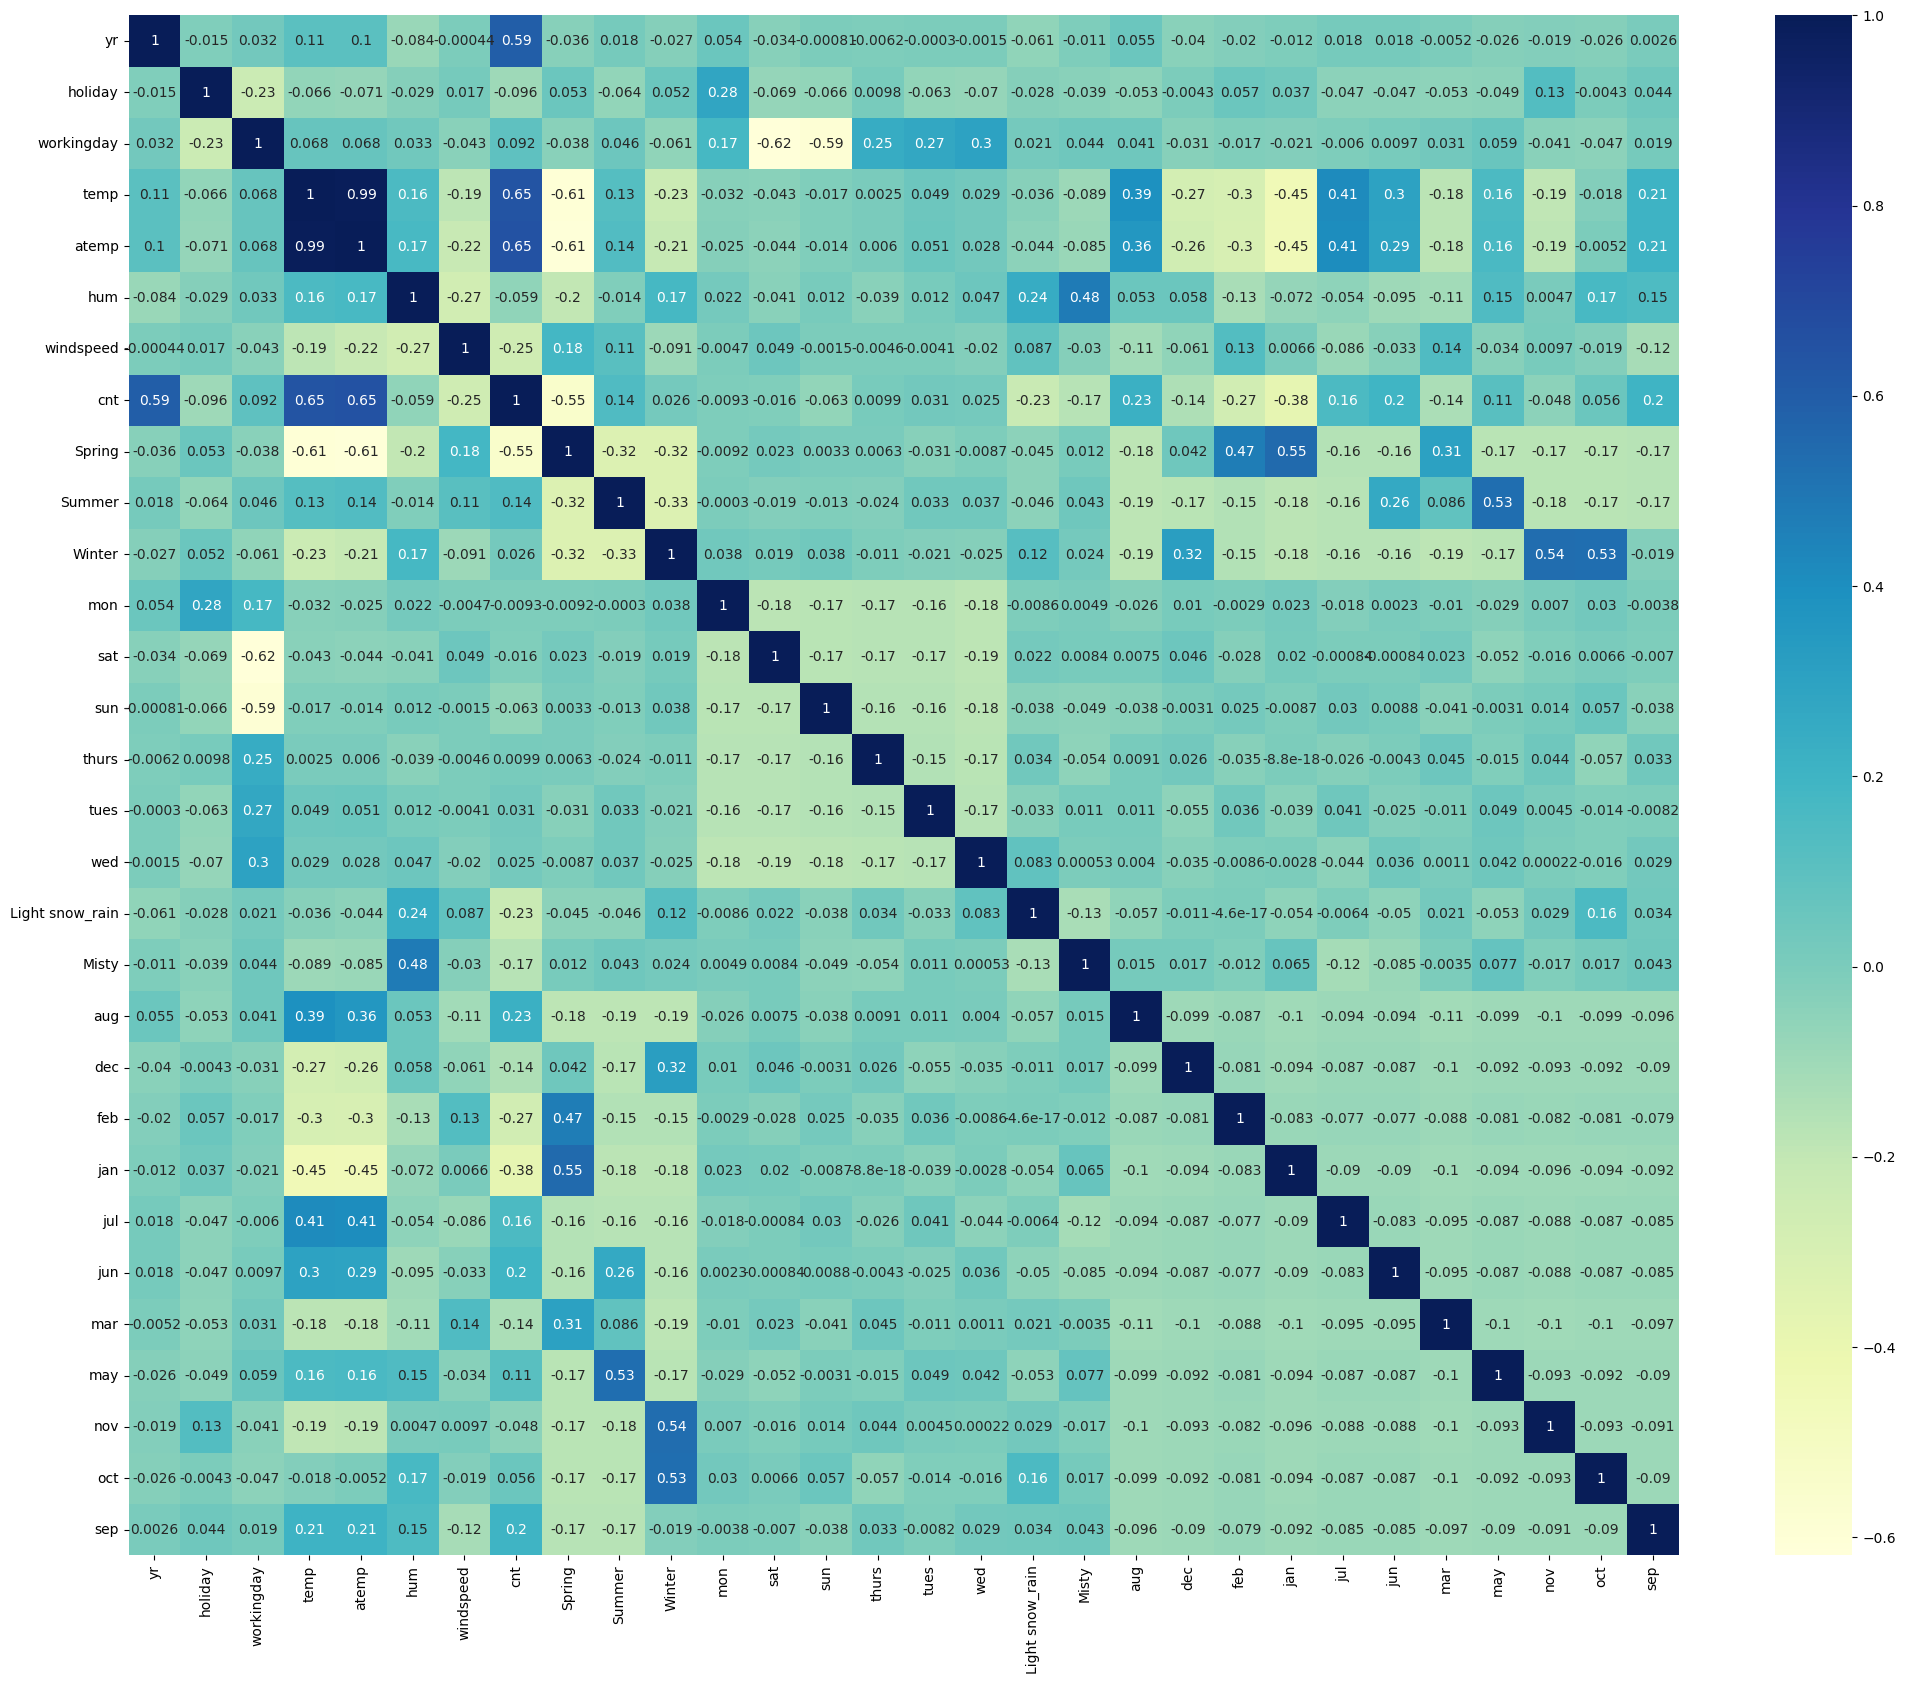

In [278]:
# checking correlation between variables by plotting heatmap

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [279]:
# Assigning X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train


In [280]:
print(X_train.shape)
y_train.shape
y_train.sample(5)

(510, 29)


39     1605
326    2566
212    4266
38     1530
426    4066
Name: cnt, dtype: int64

### Feature Selection using RFE(Recursive Feature Elimination)

For model building, I am going with RFE method as there are more number of vaariables to select from and build an efficient model. It is the automated approach. We also have manual approaches to train and build model which can be little tideous in this case

In [281]:
# Running RFE with the Output Number of variables equals to 20
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm, n_features_to_select = 16)
rfe = rfe.fit(X_train, y_train)

In [282]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thurs', False, 10),
 ('tues', False, 9),
 ('wed', False, 11),
 ('Light snow_rain', True, 1),
 ('Misty', True, 1),
 ('aug', False, 7),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1)]

In [283]:
true_rfe = X_train.columns[rfe.support_]

In [284]:
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'sat', 'Light snow_rain', 'Misty', 'jan', 'jul',
       'nov', 'sep'],
      dtype='object')

# **Model Building**

In [285]:
X_train_rfe = X_train[true_rfe]

In [286]:
# Common fuction to calculate VIF

def cal_vif(df):
  vif = pd.DataFrame()
  X = df
  vif['Features'] = X.columns
  vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  vif['VIF']= round(vif['VIF'],2)
  vif = vif.sort_values(by='VIF',ascending=False)
  return vif

# Commom Function to build model
def build_model(df):
    #creating first training model with rfe selected variables
    lr = sm.OLS(y_train, df)
    #fit
    lr_model = lr.fit()
    #params
    return lr_model.summary()

In [287]:
X_train_rfe = sm.add_constant(X_train_rfe)
print(build_model(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.30e-190
Time:                        15:05:25   Log-Likelihood:                -4105.2
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     493   BIC:                             8316.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2270.1090    316.823     

From above, we can see P-values of holiday and atemp is highest. According to rule of thumb any var p-value > 0.05 should be deleted.But we will recheck and confirm by calculating VIF.
R-square is 0.85 which means our model is efficient and good enough.

There are some rules to check before dropping cols
High p, high VIF
High p, low vif --> precedence
low p , high Vif
low p, low vif

# **Calculating VIF**

In [288]:
cal_vif(X_train_rfe)

,Features,VIF
0,const,86.17
7,Spring,5.20
4,temp,3.97
9,Winter,3.77
8,Summer,2.68
5,hum,1.92
3,workingday,1.88
10,sat,1.78
12,Misty,1.57
13,jan,1.57


In [289]:
# dropping holiday col as it has high p-value and low vif
X_rfe1 = X_train_rfe.drop(['nov'], axis=1)

In [290]:
# Rebuilding model
X_lr1 = sm.add_constant(X_rfe1)
print(build_model(X_lr1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.22e-191
Time:                        15:05:26   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2211.4527    314.189     

In [291]:
#Recalculating vif
cal_vif(X_lr1)

,Features,VIF
0,const,84.60
7,Spring,5.08
4,temp,3.89
9,Winter,3.59
8,Summer,2.65
5,hum,1.91
3,workingday,1.88
10,sat,1.78
12,Misty,1.57
13,jan,1.57


In [292]:
# dropping atemp col as it has high p-value and low vif
X_rfe2 = X_lr1.drop(['jan'], axis=1)

In [293]:
X_lr2 = sm.add_constant(X_rfe2)
print(build_model(X_lr2))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.11e-191
Time:                        15:05:26   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2109.4938    310.905     

In [294]:
cal_vif(X_lr2)

,Features,VIF
0,const,82.35
7,Spring,5.02
4,temp,3.62
9,Winter,3.49
8,Summer,2.62
5,hum,1.91
3,workingday,1.88
10,sat,1.78
12,Misty,1.57
13,jul,1.49


In [295]:
X_rfe3 = X_lr2.drop('holiday', axis=1)

In [296]:
X_lr3 = sm.add_constant(X_rfe3)
print(build_model(X_lr3))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.54e-191
Time:                        15:05:26   Log-Likelihood:                -4110.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     496   BIC:                             8309.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2026.8932    309.793     

In [297]:
cal_vif(X_lr3)

,Features,VIF
0,const,81.14
6,Spring,5.02
3,temp,3.62
8,Winter,3.48
7,Summer,2.62
4,hum,1.91
2,workingday,1.65
9,sat,1.64
11,Misty,1.57
12,jul,1.49


In [298]:
X_rfe4 = X_lr3.drop('Spring', axis=1)

In [299]:
X_lr4 = sm.add_constant(X_rfe4)
print(build_model(X_lr4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.14e-191
Time:                        15:05:26   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     497   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1510.4502    247.486     

In [300]:
#adding constant to training variable
X_lr5 = sm.add_constant(X_lr4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.14e-191
Time:                        15:05:26   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     497   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1510.4502    247.486      6.103      0.000    1024.202    1996.698
yr               1986.8275     70.289     28.267      0.000    1848.727    2124.928
workingday        455.8214     95.135      4.791      0.000     268.906     642.737
temp             5180.3235    194.263     26.667      0.000    4798.646    5562.001
hum             -1485.5976    325.913     -4.558      0.000   -2125.934    -845.261
windspeed       -1640.8090    221.932     -7.393      0.000   -2076.850   -1204.767
Summer            718.5678     92.476      7.770      0.000     536.876     900.260
Winter           1177.7974     91.092     12.930      0.000     998.825    1356.770
sat               542.8891    122.581      4.429      0.000     302.048     783.730
Light snow_rain -2078.5763    228.420     -9.100      0.000   -2527.365   -1629.788
Misty            -466.0931     90.866     -5.129      0.000    -644.621    -287.565
jul              -381.8971    155.860     -2.450      0.015    -688.123     -75.672
sep               806.8936    138.739      5.816      0.000     534.305    1079.482
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can conclude by looking at results of X_lr5 model. Here we can observe the p-values of vars are <0.05 which seems to be significant and it seems there is very less multicollinearity between predictor var.


In [301]:
cal_vif(X_lr5)

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
8,sat,1.64
3,temp,1.60
10,Misty,1.56
11,jul,1.43
6,Summer,1.33
7,Winter,1.29
9,Light snow_rain,1.24


# **Step 4: Residual Analysis**

In [302]:
X_lr5.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'sat', 'Light snow_rain', 'Misty', 'jul', 'sep'],
      dtype='object')

In [303]:
# calculating y_train_pred
y_train_pred = lr_model.predict(X_lr5)


In [304]:
# Calculating residual
res = y_train - y_train_pred

<ipython-input-305-49cd9f9ae4cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


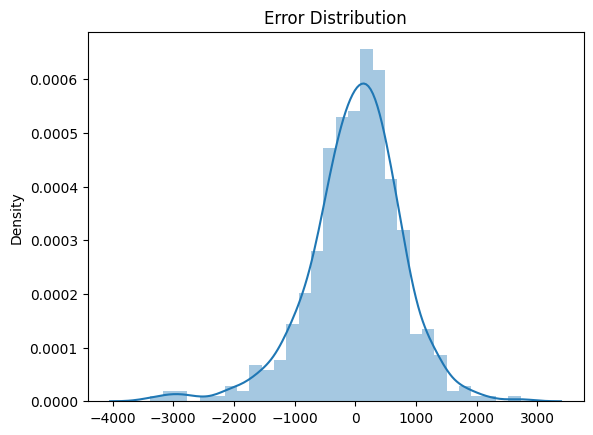

In [305]:
# Ploting histogram of error terms
# Distribution of error should be around mean 0 and normal distribution.
sns.distplot(res)
plt.title('Error Distribution')
plt.show()

# **Checking if Assumptions for linear regression holds true by the trained**

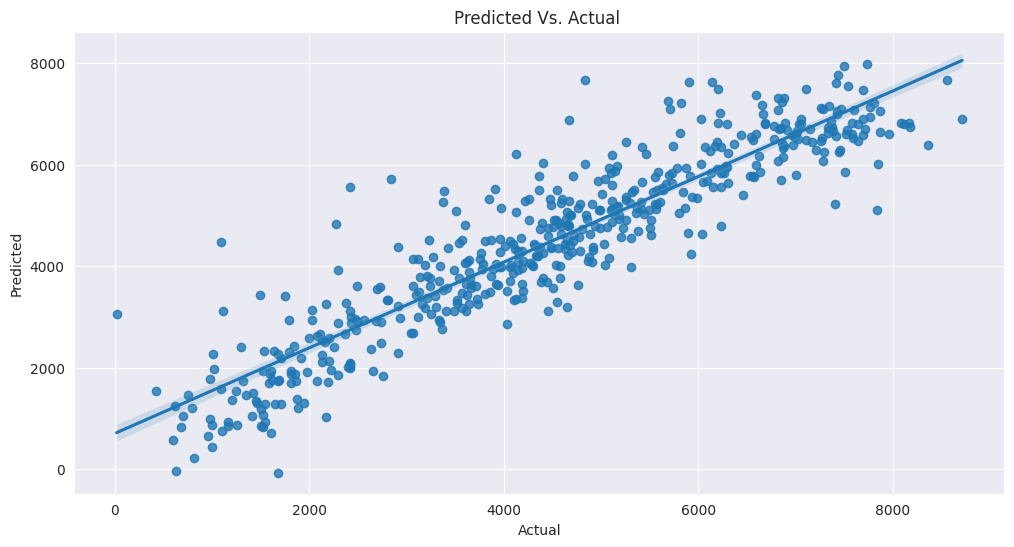

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Actual ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

We observe the constant variance in error terms which proves its following assumption of Homoscedasticity.

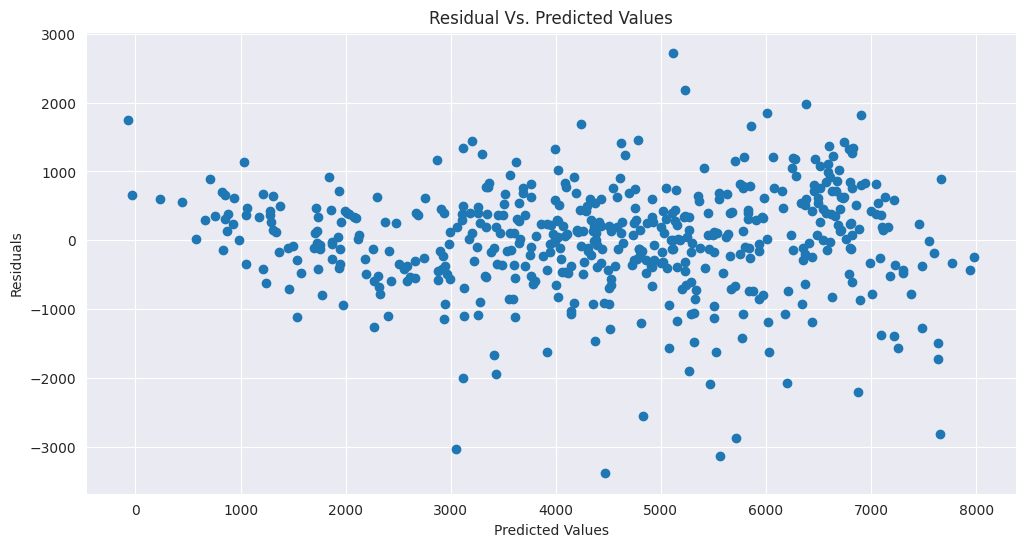

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

As there is no specific pattern observed, we can conclude that error terms are independent of each other.

# **Step 5: Prediction and Evaluation on test sets**

In [306]:
# Scaling test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,0,1,0,0,0,0,0


In [307]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [308]:
# Assigning X_test and y_test var

y_test = df_test.pop('cnt')
X_test = df_test

In [309]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,0,0,0


In [314]:
X_lr5.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'sat', 'Light snow_rain', 'Misty', 'jul', 'sep'],
      dtype='object')

In [315]:
X_lr5.drop(columns='const', inplace=True)

In [316]:
X_test_sm_new = X_test_sm[X_lr5.columns]
X_test_sm_new = sm.add_constant(X_test_sm_new)

In [317]:
# Calculating y_test_pred
y_test_pred = lr_model.predict(X_test_sm_new)

In [318]:
r2_test = r2_score(y_true= y_test, y_pred=y_test_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8069504602915927


In [319]:
r2_train = r2_score(y_true= y_train, y_pred=y_train_pred)
print('r2 score on the test set is', r2_train)

r2 score on the test set is 0.8431728636710809


r2_score for trained model is **0.84** whereas r2_score of tested data is **0.81** which is pretty good score.

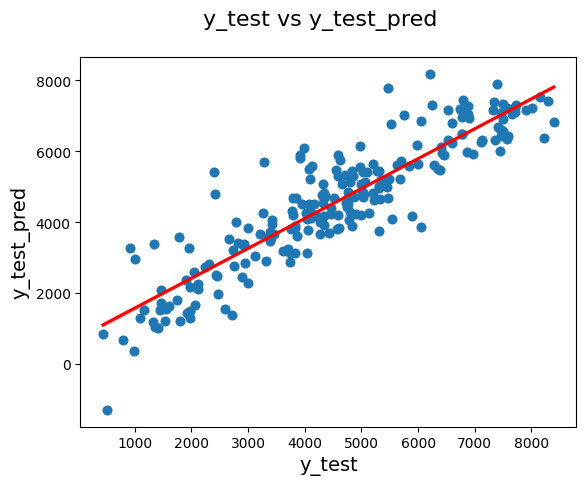

In [320]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 16)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_test_pred', fontsize = 14)
plt.show()

# **The final model accuracy of train dataset is 84% and that of test dataset is 80%.**
# The difference between the accuracy of train and test dataset is 4% which is acceptble.

**Summary:**
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1. The R-squared value of the train set is 84.37% whereas the test set has a value of 80.69% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

2. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.

3. The bike demands for the BoomBikes is company is dependent on the **temperature** and whether it is a **workingday** or not.
4. More rentals seem to be demanded on the **fall** and **summer** as compared to the winter and spring.
5. The months from **June** to **September** had higher use of rentals.

These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people.

**Recommendations: **
1. There should be aggressive marketing in the summer and fall season to increase rentals.

2. A good approach required to introduce more users on days when the weather is less clear, perhaps with exciting deals and offers. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and strong analysis should be done to retain the repeative customers.